[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day02/Practice06_Discriminator_CNN.ipynb)

##Discriminator | Convolutional Neural Network
We use mnist dataset.

Assume that images of ONE are REAL(1), and those of SEVEN are FAKE(0).

We investigate whether a discriminator can distinguish ONE from SEVEN.

<img src="https://drive.google.com/uc?id=1gaPSSjsATGxhR87g9iEw4UVNcX0iF9Bk" width="800">


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist

from keras.layers import (
    Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape, MaxPooling2D)


from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU 
from keras.models import Sequential
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D
#from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model


pd.set_option('display.max_columns', 28)

In [2]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)

## Discriminator

In [4]:
def build_discriminator(img_shape):

    model = Sequential()
    model.add(Conv2D(  , kernel_size=3, strides=2, input_shape=img_shape, padding='same'))

    model.add(LeakyReLU(alpha=0.01))            

    model.add(Conv2D(  , kernel_size=3, strides=2, padding='same'))

    #model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    model.add(Conv2D(  , kernel_size=3, strides=2, padding='same'))

    #model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    #model.add(MaxPooling2D(pool_size=2, strides=None, padding='valid'))

    model.add(Flatten())                        

    model.add(Dense(1, activation='sigmoid'))


    return model

In [ ]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
discriminator.summary()
plot_model(discriminator, to_file='model.png', show_shapes=True)

## Load MNIST

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

## Function for shoing images

In [7]:
def show_img(img, figsize=(2,2)):
    fig = plt.figure(figsize=figsize,dpi=100)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

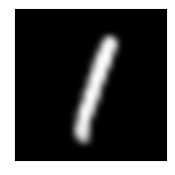

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
char = 1
X_test = X_test[np.where(y_test==char)]  

show_img(X_test[1])

In [ ]:
pd.DataFrame(X_test[1])

## Training function

In [10]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(batch_size, sample_interval, n_epochs = 1):

    # Load the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    char = 1 #True image
    X_train_1 = X_train[np.where(y_train==char)]    

    char = 7 #Fake image
    X_train_7 = X_train[np.where(y_train==char)]  

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train_1 = X_train_1 / 127.5 - 1.0
    X_train_7 = X_train_7 / 127.5 - 1.0
   # X_train = np.expand_dims(X_train, axis=3)

    #
    #bat_per_epo = int((X_train_1.shape[0] + X_train_7.shape[0]) / batch_size)
    half_batch = int(batch_size / 2)

    #print(bat_per_epo, half_batch )
    # Labels for real images: all ones
    real = np.ones((half_batch, 1))
    # Labels for fake images: all zeros
    fake = np.zeros((half_batch, 1))
    
    bat_per_epo = 10

    for i in range(n_epochs):
        for j in range(bat_per_epo):

          # -------------------------
          #  Train the Discriminator
          # -------------------------

          # Get a random batch of real images
          idx = np.random.randint(0, X_train_1.shape[0], half_batch)
          imgs = X_train_1[idx]

          # Get a random batch of fake images
          idx = np.random.randint(0, X_train_7.shape[0], half_batch)
          fake_img = X_train_7[idx]

          # Train Discriminator
          d_loss_real = discriminator.train_on_batch(imgs, real)
          d_loss_fake = discriminator.train_on_batch(fake_img , fake)
          # print(d_loss_real, d_loss_fake)
          d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

          if (i*10 +  j + 1) % sample_interval == 0 :

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(i*10 +  j + 1)

            # Output training progress
            print("Epoch:%d %d/%d [D loss: %f, acc.: %.2f%%]" %
                  (i + 1, j+1, bat_per_epo, d_loss, 100.0 * accuracy))

### Training

In [ ]:
# Set hyperparameters
batch_size = 128
sample_interval = 1

# Train the Discriminator for the specified number of iterations
train(batch_size, sample_interval)

## Test

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
char = 1 #True image: A label for 1 is "1"
X_test_1 = X_test[np.where(y_test==char)]    
y_test_1 = y_test[np.where(y_test==char)]  
y_test_1 = np.ones((y_test_1.shape[0], 1))

char = 7 #Fake image: A label for 7 is "0"
X_test_7 = X_test[np.where(y_test==char)]  
y_test_7 = y_test[np.where(y_test==char)]  
y_test_7 = np.zeros((y_test_7.shape[0], 1))

In [13]:
_, accuracy = discriminator.evaluate(X_test_1, y_test_1)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

36/36 [==============================] - 0s 7ms/step - loss: 1.2519 - accuracy: 0.9621
Training Accuracy: 96.21%


In [14]:
_, accuracy = discriminator.evaluate(X_test_7, y_test_7)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

33/33 [==============================] - 0s 7ms/step - loss: 1.2623 - accuracy: 0.9640
Training Accuracy: 96.40%


In [ ]:
#fake_img = np.zeros((batch_size, 28, 28)) -1
 #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
(X_train, _), (X_test, _) = mnist.load_data()
char = 1 #True image
X_test_1 = X_test[np.where(y_test==char)]    

char = 7 #Fake image
X_test_7 = X_test[np.where(y_test==char)]  

test_size = 10

#### test 1: real image
idx = np.random.randint(0, X_test_1.shape[0], test_size)
imgs_1 = X_test_1[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_1[i])

y = discriminator.predict(imgs_1)
print(y)

false = np.where(y<=0.5)
print(false)


#### test 7: fake image
idx = np.random.randint(0, X_test_7.shape[0], test_size)
imgs_7 = X_test_7[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_7[i])

y = discriminator.predict(imgs_7)
print(y)
false = np.where(y>=0.5)
print(false)

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")


plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()